In [1]:
import sys
import os

In [3]:
sys.path.append(os.path.abspath('..'))
import inequality
import libpysal

In [4]:
libpysal.examples.available()

['georgia',
 '__pycache__',
 'tests',
 'newHaven',
 'Polygon_Holes',
 'nat',
 'Polygon',
 '10740',
 'berlin',
 'rio_grande_do_sul',
 'sids2',
 'sacramento2',
 'burkitt',
 'arcgis',
 'calemp',
 'stl',
 'virginia',
 'geodanet',
 'desmith',
 'book',
 'nyc_bikes',
 'Line',
 'south',
 'snow_maps',
 'Point',
 'street_net_pts',
 'guerry',
 '__pycache__',
 'baltim',
 'networks',
 'us_income',
 'taz',
 'columbus',
 'tokyo',
 'mexico',
 '__pycache__',
 'chicago',
 'wmat',
 'juvenile',
 'clearwater']

In [5]:
libpysal.examples.explain('mexico')

{'name': 'mexico',
 'description': 'Decennial per capita incomes of Mexican states 1940-2000',
 'explanation': ['* mexico.csv: attribute data. (n=32, k=13)',
  '* mexico.gal: spatial weights in GAL format.',
  '* mexicojoin.shp: Polygon shapefile. (n=32)',
  'Data used in Rey, S.J. and M.L. Sastre Gutierrez. (2010) "Interregional inequality dynamics in Mexico." Spatial Economic Analysis, 5: 277-298.']}

In [6]:
import geopandas
pth = libpysal.examples.get_path("mexicojoin.shp")
gdf = geopandas.read_file(pth)

from libpysal.weights import Queen, Rook, KNN

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt


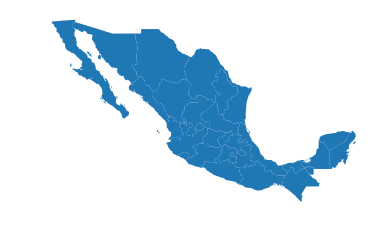

In [9]:
ax = gdf.plot()
ax.set_axis_off()

In [10]:
gdf.head()

,POLY_ID,AREA,CODE,NAME,PERIMETER,ACRES,HECTARES,PCGDP1940,PCGDP1950,PCGDP1960,...,GR9000,LPCGDP40,LPCGDP50,LPCGDP60,LPCGDP70,LPCGDP80,LPCGDP90,LPCGDP00,TEST,geometry
0,1,7.252751e+10,MX02,Baja California Norte,2040312.385,1.792187e+07,7252751.376,22361.0,20977.0,17865.0,...,0.05,4.35,4.32,4.25,4.40,4.47,4.43,4.48,1.0,(POLYGON ((-113.1397171020508 29.0177764892578...
1,2,7.225988e+10,MX03,Baja California Sur,2912880.772,1.785573e+07,7225987.769,9573.0,16013.0,16707.0,...,0.00,3.98,4.20,4.22,4.39,4.46,4.41,4.42,2.0,(POLYGON ((-111.2061233520508 25.8027763366699...
2,3,2.731957e+10,MX18,Nayarit,1034770.341,6.750785e+06,2731956.859,4836.0,7515.0,7621.0,...,-0.05,3.68,3.88,3.88,4.04,4.13,4.11,4.06,3.0,(POLYGON ((-106.6210784912109 21.5653114318847...
3,4,7.961008e+10,MX14,Jalisco,2324727.436,1.967200e+07,7961008.285,5309.0,8232.0,9953.0,...,0.03,3.73,3.92,4.00,4.21,4.32,4.30,4.33,4.0,"POLYGON ((-101.52490234375 21.85663986206055, ..."
4,5,5.467030e+09,MX01,Aguascalientes,313895.530,1.350927e+06,546702.985,10384.0,6234.0,8714.0,...,0.13,4.02,3.79,3.94,4.21,4.32,4.32,4.44,5.0,POLYGON ((-101.8461990356445 22.01176071166992...


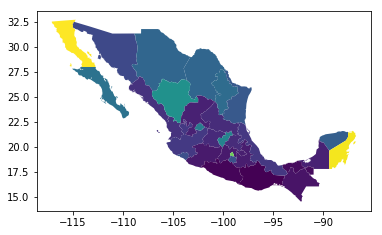

In [11]:
gdf.plot(column='PCGDP1940')

In [14]:
gini_1940 = inequality.gini.Gini(gdf['PCGDP1940'])

In [17]:
gini_1940.g

0.3537237117345285

In [19]:
decades = range(1940, 2010, 10)
decades

range(1940, 2010, 10)

In [21]:
ginis = [ inequality.gini.Gini(gdf["PCGDP%s"%decade]).g for decade in decades]

In [22]:
ginis

[0.3537237117345285,
 0.29644613439022827,
 0.2537183285655905,
 0.25513356494927303,
 0.24505338049421577,
 0.25181825879538217,
 0.2581130824882791]

In [23]:
inequality.gini.Gini_Spatial

Init signature: inequality.gini.Gini_Spatial(x, w, permutations=99)
Docstring:     
Spatial Gini coefficient

Provides for computationally based inference regarding the contribution of
spatial neighbor pairs to overall inequality across a set of regions. [Rey2013]_

Parameters
----------

y : array (n,1)
   attribute

w : binary spatial weights object

permutations : int (default = 99)
   number of permutations for inference

Attributes
----------

g : float
   Gini coefficient

wg : float
   Neighbor inequality component (geographic inequality)

wcg : float
   Non-neighbor inequality component (geographic complement inequality)

wcg_share : float
   Share of inequality in non-neighbor component

If Permuations > 0

p_sim : float
   pseudo p-value for spatial gini

e_wcg : float
   expected value of non-neighbor inequality component (level) from permutations

s_wcg : float
       standard deviation non-neighbor inequality component (level) from permutations

z_wcg : float
       z-valu

In [35]:
regimes = gdf['HANSON98']

In [36]:
w = libpysal.weights.block_weights(regimes)

/home/serge/Dropbox/p/pysal/src/subpackages/libpysal/libpysal/weights/weights.py:170: UserWarning: The weights matrix is not fully connected. There are 5 components
  warnings.warn("The weights matrix is not fully connected. There are %d components" % self.n_components)


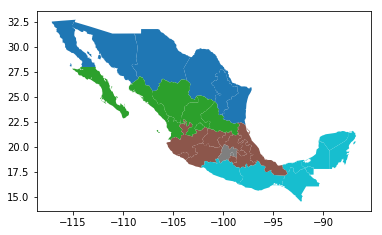

In [37]:
gdf.plot(column='HANSON98', categorical=True)

In [30]:
import numpy as np
np.random.seed(12345)
gs = inequality.gini.Gini_Spatial(gdf['PCGDP1940'],w)

/home/serge/Dropbox/p/pysal/src/subpackages/libpysal/libpysal/weights/weights.py:170: UserWarning: The weights matrix is not fully connected. There are 5 components
  warnings.warn("The weights matrix is not fully connected. There are %d components" % self.n_components)


In [31]:
gs.p_sim

0.01

In [32]:
gs_all = [ inequality.gini.Gini_Spatial(gdf["PCGDP%s"%decade], w) for decade in decades]

In [33]:
p_values = [gs.p_sim for gs in gs_all]

In [34]:
p_values

[0.04, 0.01, 0.01, 0.01, 0.02, 0.01, 0.01]